In [7]:
# a bit of setup
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats
from pydub import AudioSegment
% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def metropolis_hastings(proposal_func, init_func, acceptance_score, num_iters, step=30):
    """
    Runs the metropolis-hastings algorithm for
    num_iters iterations, using proposal_func
    to generate samples and scorer to assign
    probability scores to samples.
      
    proposal_func -- function that proposes
        candidate state; takes in current state as
        argument and returns candidate state
    init_func -- function that proposes starting
        state; takes no arguments and returns a
        sample state
    acceptance_score -- function that calculates the acceptance
        probability; takes in two state samples
        (candidate first, then sample) and returns
        acceptance probability
    
    Returns a sequence of every step-th sample. You 
    should only sample on upon acceptance of a new
    proposal. Do not keep sampling the current state.
    
    Note the total number of samples will NOT be
    equal to num_iters. num_iters is the total number
    of proposals we generate.
    """
    samples = []
    sample = init_func()
    for i in range(num_iters):
        candidate = proposal_func(sample)
        acceptance_ratio = min(1, acceptance_score(candidate,sample))
        if np.random.uniform() < acceptance_ratio:
            sample = candidate
            samples.append(sample)
    return samples[::step]

In [13]:


def build_bigram_freq_matrix(input_arr, alphabet_size):
    """
    Builds a matrix that represents the transitional
    probabilities between letters in input_file.
    
    bigram_freq_matrix[0][1] is the probability of
    transitioning from the 0th letter of the alphabet
    to the 1st letter of the alphabet, where letters
    are zero-indexed. ' ' (space) is denoted as the
    26th letter of the alphabet.
    """
    counts = np.ones([alphabet_size, alphabet_size])
    
    for i in range(len(input_arr) - 2):
        first_char = input_arr[i]
        second_char = input_arr[i+1]
        counts[first_char][second_char] += 1
        
    return (counts.T / np.sum(counts, axis=1)).T
        

In [14]:
four_seconds = 4 * 1000
seven_seconds = 7 * 1000
song = AudioSegment.from_file(
    "../music/Audiobinger_-_Bottom_Feeders.mp3", format="mp3")\
[four_seconds:seven_seconds].set_frame_rate(1800)
song

In [15]:
input_arr = song.get_array_of_samples()
alphabet_size = max(input_arr) - min(input_arr) + 1
M = build_bigram_freq_matrix(input_arr, alphabet_size)

In [17]:
M

array([[  5.38184167e-05,   5.38184167e-05,   5.38184167e-05, ...,
          5.38184167e-05,   5.38184167e-05,   5.38184167e-05],
       [  5.38184167e-05,   5.38184167e-05,   5.38184167e-05, ...,
          5.38184167e-05,   5.38184167e-05,   5.38184167e-05],
       [  5.38184167e-05,   5.38184167e-05,   5.38184167e-05, ...,
          5.38184167e-05,   5.38184167e-05,   5.38184167e-05],
       ..., 
       [  5.38242101e-05,   5.38242101e-05,   5.38242101e-05, ...,
          5.38242101e-05,   5.38242101e-05,   5.38242101e-05],
       [  5.38126244e-05,   5.38126244e-05,   5.38126244e-05, ...,
          5.38126244e-05,   5.38126244e-05,   5.38126244e-05],
       [  5.38155204e-05,   5.38155204e-05,   5.38155204e-05, ...,
          5.38155204e-05,   5.38155204e-05,   5.38155204e-05]])

In [19]:
np.max(M)

0.00016144656118824668

In [20]:
T = M * 10000

In [21]:
np.max(T)

1.6144656118824667

(array([     0.,      0.,      0.,      0.,      0.,  18579.,      0.,
             0.,      0.,      0.]),
 array([ 0.0382421,  0.1382421,  0.2382421,  0.3382421,  0.4382421,
         0.5382421,  0.6382421,  0.7382421,  0.8382421,  0.9382421,
         1.0382421]),
 <a list of 10 Patch objects>)

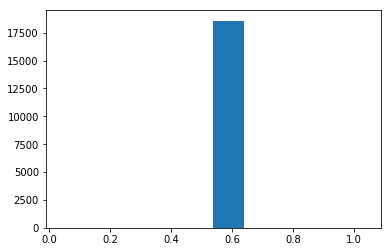

In [34]:
plt.hist(T[5000])